## Before you start

### Select the runtime

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Fri Jul 11 09:56:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install dependencjes

**Note:** Let's install the `inference-gpu` library, which will be used to efficiently run our object detection and keypoint detection models on GPUs.

In [ ]:
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.9 MB/s eta 

**Note:** Let's install the sports repository directly from GitHub. The sports repository contains a variety of football-related utilities that we'll use along the way.

In [ ]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done


**Note:** Let's make sure we have the latest features in the supervision library by installing version `0.23.0` or higher.

In [ ]:
!pip list | grep supervision

supervision                           0.25.1


In [ ]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

## ball, player, goalkeeper and referee detection

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

# Load your local model
model = YOLO('best.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


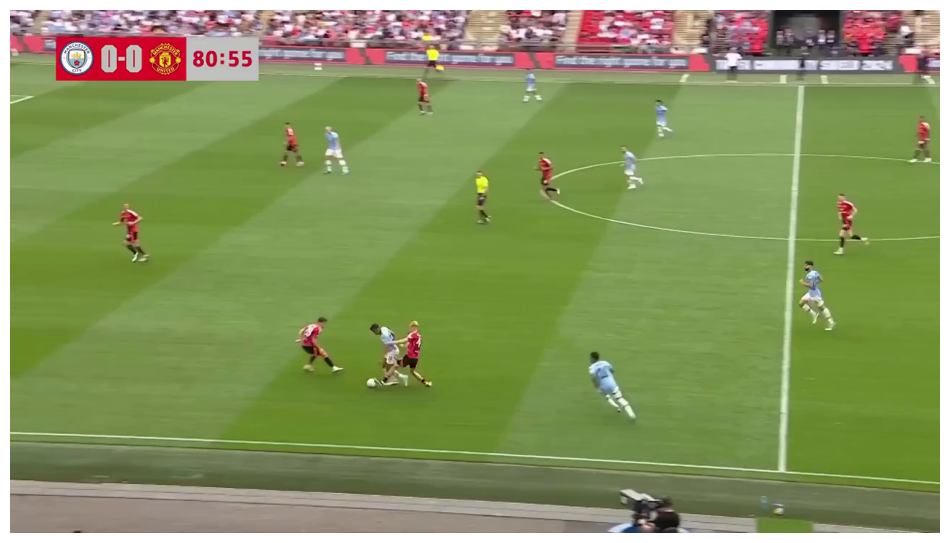

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "15sec_input_720p.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)


0: 384x640 1 ball, 16 players, 2 referees, 67.5ms
Speed: 2.3ms preprocess, 67.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


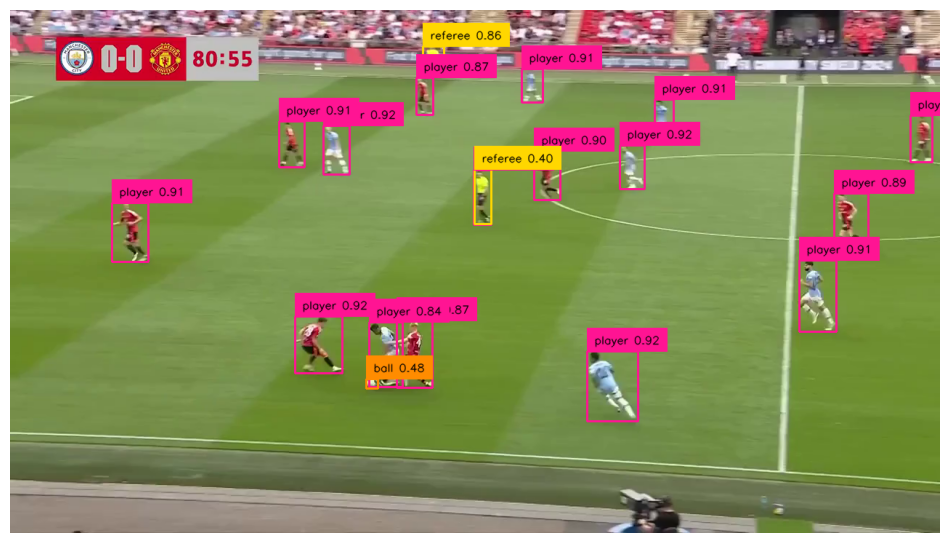

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "15sec_input_720p.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

## video game style visualization


0: 384x640 1 ball, 16 players, 2 referees, 67.6ms
Speed: 3.5ms preprocess, 67.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}


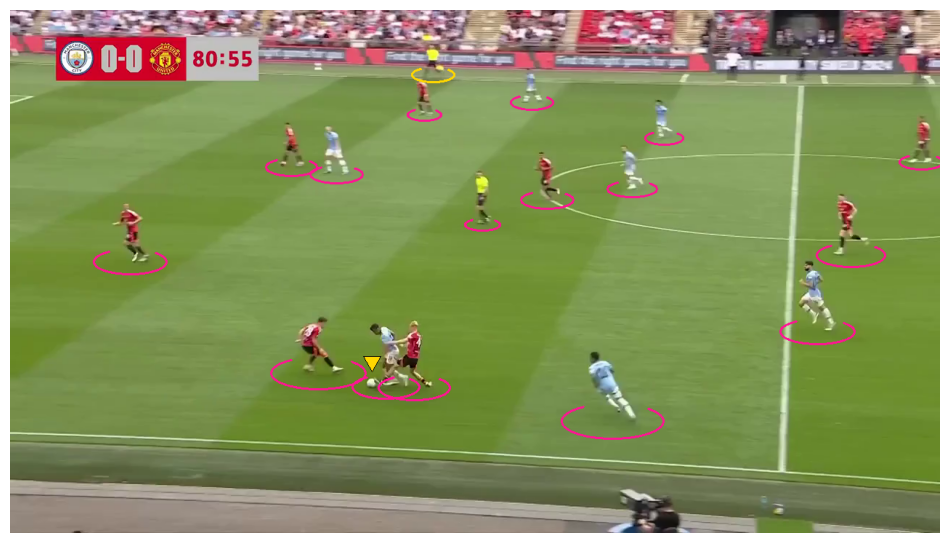

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "15sec_input_720p.mp4"
BALL_ID = 0

# annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = model(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

print(model.names)
sv.plot_image(annotated_frame)

## player tracking

In [ ]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "15sec_input_720p.mp4"
TARGET_VIDEO_PATH = "reid_output.mp4"
BALL_ID = 0 
REFEREE_ID = 3

# --- Annotators and Tracker Initialization ---
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Initialize the ByteTrack tracker with specified parameters
tracker = sv.ByteTrack(
    frame_rate=25,
    lost_track_buffer=75,
    minimum_matching_threshold=0.75
)
tracker.reset()

# --- Video Info, Sink, and Frame Generator  ---
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# --- Processing Loop ---
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # --- Inference and Detection Processing ---
        result = model(frame, conf=0.3)[0]
        detections = sv.Detections.from_ultralytics(result)

        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections = tracker.update_with_detections(detections=all_detections)

        labels = [
            f"#{tracker_id}"
            for tracker_id
            in all_detections.tracker_id
        ]

        # --- Frame Annotation ---
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(
            scene=annotated_frame,
            detections=all_detections)
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=all_detections,
            labels=labels)
        annotated_frame = triangle_annotator.annotate(
            scene=annotated_frame,
            detections=ball_detections)

        # Write the annotated frame to the output video file
        video_sink.write_frame(frame=annotated_frame)

  0%|          | 0/375 [00:00<?, ?it/s]


0: 384x640 1 ball, 16 players, 2 referees, 67.6ms
Speed: 2.2ms preprocess, 67.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


  0%|          | 1/375 [00:00<00:42,  8.72it/s]


0: 384x640 18 players, 2 referees, 67.3ms
Speed: 1.8ms preprocess, 67.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 60.3ms
Speed: 2.3ms preprocess, 60.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


  1%|          | 3/375 [00:00<00:38,  9.77it/s]


0: 384x640 1 ball, 14 players, 2 referees, 42.2ms
Speed: 2.2ms preprocess, 42.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 41.2ms
Speed: 7.8ms preprocess, 41.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


  1%|▏         | 5/375 [00:00<00:33, 11.04it/s]


0: 384x640 16 players, 2 referees, 37.1ms
Speed: 3.9ms preprocess, 37.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 7/375 [00:00<00:29, 12.37it/s]


0: 384x640 15 players, 1 referee, 36.6ms
Speed: 3.7ms preprocess, 36.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 1 referee, 34.3ms
Speed: 3.8ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 9/375 [00:00<00:27, 13.28it/s]


0: 384x640 1 ball, 15 players, 2 referees, 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 2 referees, 37.1ms
Speed: 2.2ms preprocess, 37.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 11/375 [00:00<00:26, 13.99it/s]


0: 384x640 1 ball, 15 players, 2 referees, 34.4ms
Speed: 2.5ms preprocess, 34.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 2 referees, 34.4ms
Speed: 2.5ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 13/375 [00:01<00:25, 14.22it/s]


0: 384x640 14 players, 2 referees, 33.3ms
Speed: 2.2ms preprocess, 33.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 34.8ms
Speed: 2.5ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 15/375 [00:01<00:24, 14.45it/s]


0: 384x640 19 players, 2 referees, 34.6ms
Speed: 2.2ms preprocess, 34.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 34.6ms
Speed: 2.5ms preprocess, 34.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


  5%|▍         | 17/375 [00:01<00:24, 14.44it/s]


0: 384x640 15 players, 2 referees, 34.3ms
Speed: 2.1ms preprocess, 34.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


  5%|▌         | 19/375 [00:01<00:24, 14.54it/s]


0: 384x640 15 players, 2 referees, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 34.4ms
Speed: 2.2ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 21/375 [00:01<00:24, 14.38it/s]


0: 384x640 14 players, 4 referees, 32.8ms
Speed: 2.1ms preprocess, 32.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 34.4ms
Speed: 3.0ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 23/375 [00:01<00:24, 14.23it/s]


0: 384x640 14 players, 3 referees, 33.8ms
Speed: 2.1ms preprocess, 33.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 25/375 [00:01<00:24, 14.41it/s]


0: 384x640 14 players, 3 referees, 35.1ms
Speed: 2.2ms preprocess, 35.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 27/375 [00:01<00:23, 14.77it/s]


0: 384x640 1 ball, 13 players, 2 referees, 36.4ms
Speed: 2.2ms preprocess, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 13 players, 2 referees, 35.5ms
Speed: 2.3ms preprocess, 35.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 29/375 [00:02<00:23, 14.87it/s]


0: 384x640 1 ball, 16 players, 2 referees, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 15 players, 2 referees, 35.0ms
Speed: 4.0ms preprocess, 35.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 31/375 [00:02<00:22, 15.14it/s]


0: 384x640 1 ball, 13 players, 2 referees, 35.0ms
Speed: 2.2ms preprocess, 35.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 36.3ms
Speed: 2.0ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 33/375 [00:02<00:21, 15.91it/s]


0: 384x640 15 players, 2 referees, 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3 referees, 36.5ms
Speed: 2.0ms preprocess, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 35/375 [00:02<00:20, 16.34it/s]


0: 384x640 13 players, 2 referees, 36.3ms
Speed: 2.6ms preprocess, 36.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 2 referees, 37.2ms
Speed: 2.5ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 10%|▉         | 37/375 [00:02<00:20, 16.58it/s]


0: 384x640 1 ball, 16 players, 2 referees, 35.5ms
Speed: 2.4ms preprocess, 35.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 36.7ms
Speed: 2.4ms preprocess, 36.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 10%|█         | 39/375 [00:02<00:20, 16.78it/s]


0: 384x640 1 ball, 18 players, 3 referees, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 3 referees, 36.1ms
Speed: 2.7ms preprocess, 36.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


 11%|█         | 41/375 [00:02<00:19, 16.78it/s]


0: 384x640 16 players, 3 referees, 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 36.4ms
Speed: 3.2ms preprocess, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 11%|█▏        | 43/375 [00:02<00:19, 16.79it/s]


0: 384x640 1 ball, 17 players, 2 referees, 41.2ms
Speed: 2.1ms preprocess, 41.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 18 players, 2 referees, 33.0ms
Speed: 2.1ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 45/375 [00:03<00:19, 16.66it/s]


0: 384x640 1 ball, 17 players, 2 referees, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 37.1ms
Speed: 2.3ms preprocess, 37.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 47/375 [00:03<00:19, 16.59it/s]


0: 384x640 1 ball, 16 players, 2 referees, 35.7ms
Speed: 2.1ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 49/375 [00:03<00:19, 16.75it/s]


0: 384x640 16 players, 3 referees, 35.8ms
Speed: 2.3ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▎        | 51/375 [00:03<00:19, 16.74it/s]


0: 384x640 17 players, 3 referees, 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 36.2ms
Speed: 2.4ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▍        | 53/375 [00:03<00:19, 16.72it/s]


0: 384x640 16 players, 3 referees, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4 referees, 36.1ms
Speed: 2.4ms preprocess, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 55/375 [00:03<00:18, 16.85it/s]


0: 384x640 17 players, 2 referees, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 36.3ms
Speed: 2.4ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▌        | 57/375 [00:03<00:18, 16.91it/s]


0: 384x640 13 players, 2 referees, 35.1ms
Speed: 2.1ms preprocess, 35.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▌        | 59/375 [00:03<00:18, 16.96it/s]


0: 384x640 15 players, 2 referees, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 36.8ms
Speed: 2.7ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▋        | 61/375 [00:03<00:18, 16.96it/s]


0: 384x640 1 ball, 15 players, 2 referees, 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 2 referees, 36.6ms
Speed: 2.2ms preprocess, 36.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 63/375 [00:04<00:18, 16.94it/s]


0: 384x640 14 players, 2 referees, 35.5ms
Speed: 1.8ms preprocess, 35.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 65/375 [00:04<00:18, 16.60it/s]


0: 384x640 1 ball, 16 players, 4 referees, 35.5ms
Speed: 3.7ms preprocess, 35.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 3 referees, 35.7ms
Speed: 2.5ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 67/375 [00:04<00:18, 16.37it/s]


0: 384x640 1 ball, 14 players, 4 referees, 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 69/375 [00:04<00:18, 16.54it/s]


0: 384x640 1 ball, 14 players, 2 referees, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 37.5ms
Speed: 2.1ms preprocess, 37.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 71/375 [00:04<00:18, 16.61it/s]


0: 384x640 1 ball, 14 players, 2 referees, 36.9ms
Speed: 2.2ms preprocess, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 2 referees, 36.5ms
Speed: 2.1ms preprocess, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 73/375 [00:04<00:18, 16.76it/s]


0: 384x640 1 ball, 16 players, 2 referees, 35.8ms
Speed: 2.1ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 2 referees, 37.1ms
Speed: 2.1ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 20%|██        | 75/375 [00:04<00:17, 16.92it/s]


0: 384x640 1 ball, 15 players, 2 referees, 36.6ms
Speed: 2.1ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 2 referees, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 77/375 [00:04<00:17, 17.08it/s]


0: 384x640 1 ball, 17 players, 1 referee, 36.5ms
Speed: 1.8ms preprocess, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 37.4ms
Speed: 2.0ms preprocess, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 79/375 [00:05<00:17, 16.98it/s]


0: 384x640 1 ball, 17 players, 2 referees, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 81/375 [00:05<00:17, 16.84it/s]


0: 384x640 15 players, 2 referees, 36.5ms
Speed: 3.2ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 37.3ms
Speed: 2.2ms preprocess, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 83/375 [00:05<00:17, 16.71it/s]


0: 384x640 14 players, 2 referees, 35.6ms
Speed: 1.7ms preprocess, 35.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 37.4ms
Speed: 2.2ms preprocess, 37.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 85/375 [00:05<00:17, 16.63it/s]


0: 384x640 14 players, 2 referees, 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 37.1ms
Speed: 2.4ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 87/375 [00:05<00:17, 16.64it/s]


0: 384x640 1 ball, 14 players, 2 referees, 36.6ms
Speed: 2.3ms preprocess, 36.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 36.2ms
Speed: 2.9ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▎       | 89/375 [00:05<00:17, 16.76it/s]


0: 384x640 1 ball, 16 players, 2 referees, 35.2ms
Speed: 2.2ms preprocess, 35.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 1 referee, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 91/375 [00:05<00:16, 16.80it/s]


0: 384x640 1 ball, 18 players, 3 referees, 37.2ms
Speed: 2.0ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 36.8ms
Speed: 2.6ms preprocess, 36.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▍       | 93/375 [00:05<00:16, 16.79it/s]


0: 384x640 1 ball, 17 players, 2 referees, 35.0ms
Speed: 2.5ms preprocess, 35.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 18 players, 2 referees, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▌       | 95/375 [00:06<00:16, 16.84it/s]


0: 384x640 1 ball, 16 players, 2 referees, 36.4ms
Speed: 3.1ms preprocess, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 36.3ms
Speed: 2.4ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▌       | 97/375 [00:06<00:16, 16.80it/s]


0: 384x640 1 ball, 18 players, 2 referees, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 19 players, 3 referees, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▋       | 99/375 [00:06<00:16, 16.63it/s]


0: 384x640 1 ball, 16 players, 2 referees, 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 37.1ms
Speed: 2.2ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 101/375 [00:06<00:16, 16.70it/s]


0: 384x640 1 ball, 17 players, 1 referee, 36.8ms
Speed: 2.0ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 103/375 [00:06<00:16, 16.68it/s]


0: 384x640 1 ball, 16 players, 2 referees, 36.3ms
Speed: 3.0ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 37.6ms
Speed: 2.2ms preprocess, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 105/375 [00:06<00:16, 16.60it/s]


0: 384x640 1 ball, 17 players, 2 referees, 36.2ms
Speed: 2.2ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 19 players, 2 referees, 36.9ms
Speed: 3.2ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▊       | 107/375 [00:06<00:16, 16.53it/s]


0: 384x640 1 ball, 15 players, 1 referee, 36.4ms
Speed: 2.5ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 37.0ms
Speed: 2.3ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▉       | 109/375 [00:06<00:16, 16.42it/s]


0: 384x640 1 ball, 16 players, 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 17 players, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


 30%|██▉       | 111/375 [00:06<00:16, 16.38it/s]


0: 384x640 17 players, 1 referee, 33.5ms
Speed: 2.4ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 36.3ms
Speed: 2.3ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 30%|███       | 113/375 [00:07<00:16, 16.13it/s]


0: 384x640 1 ball, 15 players, 2 referees, 34.9ms
Speed: 3.2ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 34.2ms
Speed: 2.4ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 115/375 [00:07<00:15, 16.34it/s]


0: 384x640 15 players, 1 referee, 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 1 referee, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 117/375 [00:07<00:15, 16.20it/s]


0: 384x640 16 players, 1 referee, 35.4ms
Speed: 2.0ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 1 referee, 36.2ms
Speed: 2.6ms preprocess, 36.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 119/375 [00:07<00:15, 16.21it/s]


0: 384x640 14 players, 1 referee, 35.1ms
Speed: 1.9ms preprocess, 35.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 1 referee, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 121/375 [00:07<00:15, 16.39it/s]


0: 384x640 1 ball, 15 players, 1 referee, 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 1 referee, 36.7ms
Speed: 2.3ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 123/375 [00:07<00:15, 16.62it/s]


0: 384x640 16 players, 1 referee, 36.5ms
Speed: 2.1ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 125/375 [00:07<00:15, 16.60it/s]


0: 384x640 16 players, 1 referee, 36.5ms
Speed: 3.5ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 36.3ms
Speed: 3.4ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 127/375 [00:07<00:14, 16.59it/s]


0: 384x640 15 players, 1 referee, 36.4ms
Speed: 3.3ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 1 referee, 36.8ms
Speed: 3.7ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 129/375 [00:08<00:14, 16.57it/s]


0: 384x640 1 ball, 14 players, 1 referee, 36.7ms
Speed: 2.3ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 1 referee, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▍      | 131/375 [00:08<00:14, 16.56it/s]


0: 384x640 1 ball, 15 players, 1 referee, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 17 players, 1 referee, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▌      | 133/375 [00:08<00:14, 16.35it/s]


0: 384x640 15 players, 1 referee, 33.9ms
Speed: 2.6ms preprocess, 33.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 1 referee, 37.2ms
Speed: 2.3ms preprocess, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▌      | 135/375 [00:08<00:14, 16.31it/s]


0: 384x640 15 players, 1 referee, 36.2ms
Speed: 2.4ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 1 referee, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 137/375 [00:08<00:14, 16.37it/s]


0: 384x640 1 ball, 14 players, 1 referee, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 1 referee, 37.5ms
Speed: 2.4ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 139/375 [00:08<00:14, 16.43it/s]


0: 384x640 14 players, 1 referee, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 36.7ms
Speed: 3.4ms preprocess, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 141/375 [00:08<00:14, 16.42it/s]


0: 384x640 16 players, 1 referee, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 36.7ms
Speed: 2.3ms preprocess, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 143/375 [00:08<00:14, 16.55it/s]


0: 384x640 15 players, 1 referee, 36.0ms
Speed: 1.9ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 37.6ms
Speed: 3.6ms preprocess, 37.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▊      | 145/375 [00:09<00:14, 16.41it/s]


0: 384x640 1 ball, 13 players, 2 referees, 35.9ms
Speed: 2.4ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 1 referee, 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 147/375 [00:09<00:13, 16.39it/s]


0: 384x640 1 ball, 14 players, 1 referee, 36.1ms
Speed: 1.8ms preprocess, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 36.5ms
Speed: 2.1ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 40%|███▉      | 149/375 [00:09<00:13, 16.30it/s]


0: 384x640 14 players, 1 referee, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 1 referee, 34.8ms
Speed: 3.1ms preprocess, 34.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 40%|████      | 151/375 [00:09<00:14, 15.93it/s]


0: 384x640 1 ball, 14 players, 1 referee, 37.3ms
Speed: 2.2ms preprocess, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 1 referee, 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 41%|████      | 153/375 [00:09<00:13, 16.23it/s]


0: 384x640 1 ball, 13 players, 1 referee, 36.1ms
Speed: 2.3ms preprocess, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 1 referee, 37.1ms
Speed: 2.3ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 41%|████▏     | 155/375 [00:09<00:13, 16.47it/s]


0: 384x640 13 players, 1 referee, 35.7ms
Speed: 2.3ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 36.3ms
Speed: 3.9ms preprocess, 36.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 157/375 [00:09<00:13, 16.32it/s]


0: 384x640 1 ball, 12 players, 1 referee, 35.8ms
Speed: 3.6ms preprocess, 35.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 36.4ms
Speed: 2.2ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 159/375 [00:09<00:13, 16.43it/s]


0: 384x640 14 players, 1 referee, 35.9ms
Speed: 2.2ms preprocess, 35.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 36.2ms
Speed: 2.5ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 161/375 [00:10<00:13, 16.44it/s]


0: 384x640 13 players, 1 referee, 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 36.6ms
Speed: 2.5ms preprocess, 36.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 163/375 [00:10<00:12, 16.57it/s]


0: 384x640 12 players, 1 referee, 36.8ms
Speed: 2.5ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 36.4ms
Speed: 3.8ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▍     | 165/375 [00:10<00:12, 16.57it/s]


0: 384x640 12 players, 1 referee, 34.0ms
Speed: 2.6ms preprocess, 34.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 37.5ms
Speed: 2.5ms preprocess, 37.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▍     | 167/375 [00:10<00:12, 16.02it/s]


0: 384x640 1 ball, 13 players, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 35.8ms
Speed: 2.4ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▌     | 169/375 [00:10<00:12, 16.32it/s]


0: 384x640 1 ball, 13 players, 35.3ms
Speed: 1.8ms preprocess, 35.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 36.0ms
Speed: 3.1ms preprocess, 36.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 171/375 [00:10<00:12, 16.15it/s]


0: 384x640 13 players, 1 referee, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 36.5ms
Speed: 2.3ms preprocess, 36.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 173/375 [00:10<00:12, 15.99it/s]


0: 384x640 13 players, 1 referee, 35.1ms
Speed: 2.3ms preprocess, 35.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 36.6ms
Speed: 2.3ms preprocess, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 175/375 [00:10<00:12, 15.96it/s]


0: 384x640 14 players, 35.4ms
Speed: 2.3ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 35.6ms
Speed: 2.3ms preprocess, 35.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 177/375 [00:11<00:12, 16.05it/s]


0: 384x640 13 players, 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 36.9ms
Speed: 2.2ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 179/375 [00:11<00:11, 16.35it/s]


0: 384x640 2 balls, 11 players, 1 referee, 36.0ms
Speed: 2.9ms preprocess, 36.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 36.8ms
Speed: 2.2ms preprocess, 36.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 181/375 [00:11<00:11, 16.34it/s]


0: 384x640 12 players, 1 referee, 36.4ms
Speed: 2.2ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12 players, 1 referee, 36.6ms
Speed: 2.2ms preprocess, 36.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 183/375 [00:11<00:11, 16.44it/s]


0: 384x640 14 players, 1 referee, 36.2ms
Speed: 2.4ms preprocess, 36.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 36.2ms
Speed: 2.2ms preprocess, 36.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 185/375 [00:11<00:11, 16.36it/s]


0: 384x640 12 players, 36.2ms
Speed: 1.8ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12 players, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 50%|████▉     | 187/375 [00:11<00:11, 16.38it/s]


0: 384x640 1 ball, 12 players, 1 referee, 35.7ms
Speed: 1.9ms preprocess, 35.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 36.5ms
Speed: 2.4ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 50%|█████     | 189/375 [00:11<00:11, 16.26it/s]


0: 384x640 1 ball, 11 players, 1 referee, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12 players, 1 referee, 36.1ms
Speed: 3.5ms preprocess, 36.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 191/375 [00:11<00:11, 16.34it/s]


0: 384x640 1 ball, 12 players, 35.2ms
Speed: 1.8ms preprocess, 35.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████▏    | 193/375 [00:12<00:11, 16.32it/s]


0: 384x640 2 balls, 14 players, 35.6ms
Speed: 3.1ms preprocess, 35.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 36.8ms
Speed: 2.3ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 195/375 [00:12<00:10, 16.53it/s]


0: 384x640 13 players, 37.3ms
Speed: 2.7ms preprocess, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 36.2ms
Speed: 2.5ms preprocess, 36.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 197/375 [00:12<00:11, 16.06it/s]


0: 384x640 14 players, 34.8ms
Speed: 2.3ms preprocess, 34.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 34.5ms
Speed: 3.9ms preprocess, 34.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 199/375 [00:12<00:11, 15.46it/s]


0: 384x640 16 players, 34.5ms
Speed: 2.3ms preprocess, 34.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 35.7ms
Speed: 2.7ms preprocess, 35.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▎    | 201/375 [00:12<00:11, 15.14it/s]


0: 384x640 1 ball, 17 players, 36.0ms
Speed: 2.4ms preprocess, 36.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 34.7ms
Speed: 2.2ms preprocess, 34.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▍    | 203/375 [00:12<00:11, 14.79it/s]


0: 384x640 1 ball, 14 players, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 13 players, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▍    | 205/375 [00:12<00:11, 14.80it/s]


0: 384x640 14 players, 34.2ms
Speed: 2.2ms preprocess, 34.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 35.7ms
Speed: 2.3ms preprocess, 35.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▌    | 207/375 [00:12<00:11, 15.03it/s]


0: 384x640 13 players, 35.1ms
Speed: 2.4ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▌    | 209/375 [00:13<00:11, 15.01it/s]


0: 384x640 1 ball, 13 players, 38.9ms
Speed: 2.2ms preprocess, 38.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▋    | 211/375 [00:13<00:11, 14.90it/s]


0: 384x640 12 players, 35.4ms
Speed: 2.6ms preprocess, 35.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12 players, 35.1ms
Speed: 4.4ms preprocess, 35.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 213/375 [00:13<00:10, 14.82it/s]


0: 384x640 1 ball, 12 players, 35.3ms
Speed: 2.1ms preprocess, 35.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 10 players, 34.7ms
Speed: 2.4ms preprocess, 34.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 215/375 [00:13<00:10, 14.66it/s]


0: 384x640 1 ball, 11 players, 35.0ms
Speed: 5.1ms preprocess, 35.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15 players, 33.6ms
Speed: 5.4ms preprocess, 33.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 217/375 [00:13<00:10, 14.52it/s]


0: 384x640 11 players, 34.4ms
Speed: 2.5ms preprocess, 34.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 35.2ms
Speed: 3.0ms preprocess, 35.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 219/375 [00:13<00:10, 14.78it/s]


0: 384x640 12 players, 34.9ms
Speed: 2.1ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▉    | 221/375 [00:13<00:10, 14.33it/s]


0: 384x640 8 players, 33.7ms
Speed: 2.0ms preprocess, 33.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 35.6ms
Speed: 2.0ms preprocess, 35.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▉    | 223/375 [00:14<00:10, 14.45it/s]


0: 384x640 10 players, 36.2ms
Speed: 2.1ms preprocess, 36.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 33.9ms
Speed: 2.3ms preprocess, 33.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


 60%|██████    | 225/375 [00:14<00:10, 14.27it/s]


0: 384x640 1 ball, 9 players, 33.5ms
Speed: 6.5ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 9 players, 34.4ms
Speed: 3.0ms preprocess, 34.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 227/375 [00:14<00:10, 14.10it/s]


0: 384x640 1 ball, 1 goalkeeper, 8 players, 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 9 players, 34.9ms
Speed: 2.6ms preprocess, 34.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 229/375 [00:14<00:10, 14.33it/s]


0: 384x640 2 balls, 1 goalkeeper, 11 players, 35.4ms
Speed: 2.5ms preprocess, 35.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 13 players, 34.0ms
Speed: 2.5ms preprocess, 34.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 231/375 [00:14<00:10, 14.20it/s]


0: 384x640 1 ball, 1 goalkeeper, 12 players, 36.2ms
Speed: 2.2ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 10 players, 37.7ms
Speed: 2.2ms preprocess, 37.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 233/375 [00:14<00:09, 14.83it/s]


0: 384x640 2 balls, 8 players, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 37.2ms
Speed: 2.3ms preprocess, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 235/375 [00:14<00:09, 15.12it/s]


0: 384x640 11 players, 36.4ms
Speed: 2.3ms preprocess, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 36.5ms
Speed: 2.6ms preprocess, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 237/375 [00:14<00:08, 15.49it/s]


0: 384x640 1 ball, 9 players, 36.7ms
Speed: 2.7ms preprocess, 36.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 11 players, 37.1ms
Speed: 2.4ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▎   | 239/375 [00:15<00:08, 15.73it/s]


0: 384x640 1 ball, 1 goalkeeper, 9 players, 36.5ms
Speed: 2.4ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 8 players, 37.2ms
Speed: 2.2ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▍   | 241/375 [00:15<00:08, 16.13it/s]


0: 384x640 1 goalkeeper, 7 players, 37.3ms
Speed: 2.6ms preprocess, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 7 players, 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▍   | 243/375 [00:15<00:08, 16.10it/s]


0: 384x640 1 goalkeeper, 8 players, 36.2ms
Speed: 2.2ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▌   | 245/375 [00:15<00:08, 16.24it/s]


0: 384x640 2 balls, 1 goalkeeper, 9 players, 37.3ms
Speed: 2.2ms preprocess, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 37.5ms
Speed: 2.2ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 247/375 [00:15<00:07, 16.41it/s]


0: 384x640 1 ball, 1 goalkeeper, 9 players, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 11 players, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▋   | 249/375 [00:15<00:07, 16.16it/s]


0: 384x640 1 ball, 1 goalkeeper, 10 players, 35.2ms
Speed: 1.8ms preprocess, 35.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 1 goalkeeper, 9 players, 37.6ms
Speed: 2.2ms preprocess, 37.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 251/375 [00:15<00:07, 16.17it/s]


0: 384x640 1 ball, 9 players, 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 10 players, 36.0ms
Speed: 2.3ms preprocess, 36.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 253/375 [00:15<00:07, 16.17it/s]


0: 384x640 10 players, 35.6ms
Speed: 2.1ms preprocess, 35.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 36.7ms
Speed: 2.4ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 255/375 [00:16<00:07, 16.18it/s]


0: 384x640 10 players, 35.5ms
Speed: 2.3ms preprocess, 35.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 36.2ms
Speed: 2.2ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▊   | 257/375 [00:16<00:07, 16.23it/s]


0: 384x640 1 goalkeeper, 10 players, 36.0ms
Speed: 2.4ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 10 players, 36.4ms
Speed: 2.5ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▉   | 259/375 [00:16<00:07, 16.13it/s]


0: 384x640 1 goalkeeper, 11 players, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 38.1ms
Speed: 2.2ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 70%|██████▉   | 261/375 [00:16<00:06, 16.31it/s]


0: 384x640 1 goalkeeper, 8 players, 36.2ms
Speed: 2.2ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 37.5ms
Speed: 2.2ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 70%|███████   | 263/375 [00:16<00:06, 16.61it/s]


0: 384x640 1 goalkeeper, 9 players, 35.3ms
Speed: 2.3ms preprocess, 35.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 37.1ms
Speed: 2.6ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 265/375 [00:16<00:06, 16.52it/s]


0: 384x640 12 players, 35.7ms
Speed: 2.5ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 267/375 [00:16<00:06, 16.51it/s]


0: 384x640 1 goalkeeper, 11 players, 36.0ms
Speed: 1.8ms preprocess, 36.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 269/375 [00:16<00:06, 16.39it/s]


0: 384x640 1 goalkeeper, 11 players, 35.6ms
Speed: 2.2ms preprocess, 35.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 37.2ms
Speed: 2.2ms preprocess, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 271/375 [00:17<00:06, 16.45it/s]


0: 384x640 1 goalkeeper, 12 players, 36.4ms
Speed: 2.7ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 13 players, 35.9ms
Speed: 2.5ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 273/375 [00:17<00:06, 16.50it/s]


0: 384x640 8 players, 34.9ms
Speed: 2.4ms preprocess, 34.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11 players, 37.4ms
Speed: 4.2ms preprocess, 37.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 275/375 [00:17<00:06, 16.57it/s]


0: 384x640 1 ball, 9 players, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 277/375 [00:17<00:05, 16.41it/s]


0: 384x640 1 ball, 10 players, 36.3ms
Speed: 2.4ms preprocess, 36.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 36.0ms
Speed: 2.1ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 279/375 [00:17<00:05, 16.39it/s]


0: 384x640 11 players, 37.4ms
Speed: 2.2ms preprocess, 37.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 37.0ms
Speed: 2.4ms preprocess, 37.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▍  | 281/375 [00:17<00:05, 16.51it/s]


0: 384x640 13 players, 35.8ms
Speed: 5.5ms preprocess, 35.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▌  | 283/375 [00:17<00:05, 16.42it/s]


0: 384x640 11 players, 36.8ms
Speed: 2.3ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 35.9ms
Speed: 2.1ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 285/375 [00:17<00:05, 16.42it/s]


0: 384x640 11 players, 37.7ms
Speed: 2.4ms preprocess, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 37.3ms
Speed: 2.4ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 287/375 [00:18<00:05, 16.47it/s]


0: 384x640 15 players, 36.1ms
Speed: 2.1ms preprocess, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 36.9ms
Speed: 2.2ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 289/375 [00:18<00:05, 16.39it/s]


0: 384x640 1 goalkeeper, 11 players, 36.4ms
Speed: 2.1ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 36.5ms
Speed: 2.2ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 291/375 [00:18<00:05, 16.17it/s]


0: 384x640 15 players, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 37.8ms
Speed: 2.2ms preprocess, 37.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 293/375 [00:18<00:05, 16.28it/s]


0: 384x640 13 players, 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 37.6ms
Speed: 2.1ms preprocess, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▊  | 295/375 [00:18<00:04, 16.39it/s]


0: 384x640 18 players, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 36.8ms
Speed: 2.5ms preprocess, 36.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 297/375 [00:18<00:04, 16.36it/s]


0: 384x640 1 goalkeeper, 16 players, 35.9ms
Speed: 2.9ms preprocess, 35.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 35.6ms
Speed: 2.3ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 80%|███████▉  | 299/375 [00:18<00:04, 16.12it/s]


0: 384x640 1 goalkeeper, 15 players, 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 37.9ms
Speed: 2.4ms preprocess, 37.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 80%|████████  | 301/375 [00:18<00:04, 16.20it/s]


0: 384x640 1 goalkeeper, 13 players, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 36.9ms
Speed: 2.3ms preprocess, 36.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████  | 303/375 [00:19<00:04, 16.10it/s]


0: 384x640 1 goalkeeper, 14 players, 36.8ms
Speed: 2.4ms preprocess, 36.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 35.8ms
Speed: 2.3ms preprocess, 35.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████▏ | 305/375 [00:19<00:04, 16.02it/s]


0: 384x640 1 goalkeeper, 17 players, 36.8ms
Speed: 2.1ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 35.6ms
Speed: 2.2ms preprocess, 35.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 307/375 [00:19<00:04, 16.02it/s]


0: 384x640 2 goalkeepers, 15 players, 35.6ms
Speed: 3.9ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 36.4ms
Speed: 2.4ms preprocess, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 309/375 [00:19<00:04, 15.94it/s]


0: 384x640 1 goalkeeper, 15 players, 36.4ms
Speed: 2.2ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 311/375 [00:19<00:03, 16.01it/s]


0: 384x640 1 goalkeeper, 19 players, 35.7ms
Speed: 2.2ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 15 players, 37.1ms
Speed: 2.2ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 313/375 [00:19<00:03, 15.76it/s]


0: 384x640 1 goalkeeper, 15 players, 36.9ms
Speed: 2.4ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 37.2ms
Speed: 2.3ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▍ | 315/375 [00:19<00:03, 15.80it/s]


0: 384x640 1 goalkeeper, 16 players, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▍ | 317/375 [00:19<00:03, 15.99it/s]


0: 384x640 1 goalkeeper, 14 players, 36.9ms
Speed: 2.2ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 goalkeeper, 16 players, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▌ | 319/375 [00:20<00:03, 16.13it/s]


0: 384x640 1 ball, 1 goalkeeper, 13 players, 35.9ms
Speed: 2.1ms preprocess, 35.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 37.3ms
Speed: 2.3ms preprocess, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 321/375 [00:20<00:03, 16.34it/s]


0: 384x640 1 ball, 14 players, 36.0ms
Speed: 2.2ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 37.1ms
Speed: 2.8ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 323/375 [00:20<00:03, 16.25it/s]


0: 384x640 14 players, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 35.9ms
Speed: 3.0ms preprocess, 35.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 325/375 [00:20<00:03, 16.29it/s]


0: 384x640 1 ball, 14 players, 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 37.5ms
Speed: 2.2ms preprocess, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 327/375 [00:20<00:02, 16.41it/s]


0: 384x640 1 ball, 16 players, 35.7ms
Speed: 2.3ms preprocess, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11 players, 36.8ms
Speed: 2.1ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 329/375 [00:20<00:02, 16.33it/s]


0: 384x640 12 players, 35.9ms
Speed: 2.3ms preprocess, 35.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 331/375 [00:20<00:02, 16.30it/s]


0: 384x640 12 players, 36.6ms
Speed: 2.2ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 37.2ms
Speed: 2.2ms preprocess, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 333/375 [00:20<00:02, 16.16it/s]


0: 384x640 13 players, 36.3ms
Speed: 2.3ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 37.3ms
Speed: 2.1ms preprocess, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 335/375 [00:20<00:02, 16.40it/s]


0: 384x640 8 players, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 37.1ms
Speed: 2.3ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 90%|████████▉ | 337/375 [00:21<00:02, 16.24it/s]


0: 384x640 10 players, 36.5ms
Speed: 2.5ms preprocess, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 37.8ms
Speed: 2.3ms preprocess, 37.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 90%|█████████ | 339/375 [00:21<00:02, 16.23it/s]


0: 384x640 14 players, 36.3ms
Speed: 2.3ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████ | 341/375 [00:21<00:02, 16.06it/s]


0: 384x640 14 players, 35.1ms
Speed: 2.3ms preprocess, 35.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 37.7ms
Speed: 2.7ms preprocess, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████▏| 343/375 [00:21<00:01, 16.03it/s]


0: 384x640 14 players, 35.9ms
Speed: 2.7ms preprocess, 35.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 36.6ms
Speed: 2.3ms preprocess, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 345/375 [00:21<00:01, 15.66it/s]


0: 384x640 15 players, 36.9ms
Speed: 2.3ms preprocess, 36.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 36.9ms
Speed: 2.6ms preprocess, 36.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 347/375 [00:21<00:01, 15.81it/s]


0: 384x640 13 players, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 35.6ms
Speed: 2.3ms preprocess, 35.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 349/375 [00:21<00:01, 15.72it/s]


0: 384x640 11 players, 35.6ms
Speed: 2.4ms preprocess, 35.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▎| 351/375 [00:22<00:01, 15.71it/s]


0: 384x640 14 players, 36.7ms
Speed: 2.4ms preprocess, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 37.2ms
Speed: 2.5ms preprocess, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▍| 353/375 [00:22<00:01, 15.67it/s]


0: 384x640 14 players, 35.2ms
Speed: 2.4ms preprocess, 35.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 36.8ms
Speed: 2.3ms preprocess, 36.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▍| 355/375 [00:22<00:01, 15.61it/s]


0: 384x640 17 players, 36.0ms
Speed: 2.3ms preprocess, 36.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▌| 357/375 [00:22<00:01, 15.89it/s]


0: 384x640 15 players, 36.1ms
Speed: 2.3ms preprocess, 36.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 36.5ms
Speed: 2.3ms preprocess, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▌| 359/375 [00:22<00:01, 15.67it/s]


0: 384x640 11 players, 37.4ms
Speed: 2.3ms preprocess, 37.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 38.0ms
Speed: 2.3ms preprocess, 38.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▋| 361/375 [00:22<00:00, 15.81it/s]


0: 384x640 15 players, 36.0ms
Speed: 2.7ms preprocess, 36.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 35.3ms
Speed: 6.9ms preprocess, 35.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 363/375 [00:22<00:00, 15.43it/s]


0: 384x640 12 players, 36.7ms
Speed: 2.2ms preprocess, 36.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 35.2ms
Speed: 2.4ms preprocess, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 365/375 [00:22<00:00, 15.25it/s]


0: 384x640 12 players, 35.6ms
Speed: 2.6ms preprocess, 35.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 36.6ms
Speed: 2.3ms preprocess, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 367/375 [00:23<00:00, 15.54it/s]


0: 384x640 13 players, 36.2ms
Speed: 2.3ms preprocess, 36.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 36.0ms
Speed: 1.8ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 369/375 [00:23<00:00, 15.54it/s]


0: 384x640 14 players, 37.9ms
Speed: 2.3ms preprocess, 37.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 36.9ms
Speed: 2.4ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 371/375 [00:23<00:00, 15.64it/s]


0: 384x640 (no detections), 37.2ms
Speed: 2.8ms preprocess, 37.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 36.9ms
Speed: 2.6ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 373/375 [00:23<00:00, 16.05it/s]


0: 384x640 1 player, 38.1ms
Speed: 2.2ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 37.8ms
Speed: 2.4ms preprocess, 37.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


100%|██████████| 375/375 [00:23<00:00, 15.93it/s]
